* https://twitter.com/1Hassium/status/1490623409637949442
* https://twitter.com/1Hassium/status/1492019379021975555

In [1]:
using Plots
default(legend=false, colorbar=false, titlefontsize=12)
gr(fmt=:png)
using CUDA

In [2]:
plotjulia(j; size=(540, 540), color=:gist_earth, kwargs...) = heatmap(j; color, size,
    colorbar=false, ticks=false, frame=false, axis=false, bgcolor=:black, kwargs...)

plotmandelbrot(m; size=(540, 540), color=reverse(cgrad(:jet1)), kwargs...) = plotjulia(m; color, size, kwargs...)

function julia(f, z, c, maxiters=2^10, threshold2=Inf, atol2=eps())
    w = z
    for i in 1:maxiters+1
        w = f(w, c)
    end
    for i in 1:maxiters
        z = f(z, c)
        abs2(z) ≥ threshold2 && return float(i)
        abs2(z - w) < atol2 && return float(i)
    end
    NaN
end

mandelbrot(f, maxiters=2^10, threshold2=Inf, atol2=eps()) =
    julia(f, zero(c), c, maxiters, threshold2, atol2)

mandelbrot (generic function with 4 methods)

typeof(z) = Matrix{ComplexF64}
  0.329589 seconds (387.23 k allocations: 23.071 MiB, 5.56% gc time, 32.16% compilation time)
  0.214671 seconds (10 allocations: 2.000 MiB)
typeof(j) = Matrix{Float64}


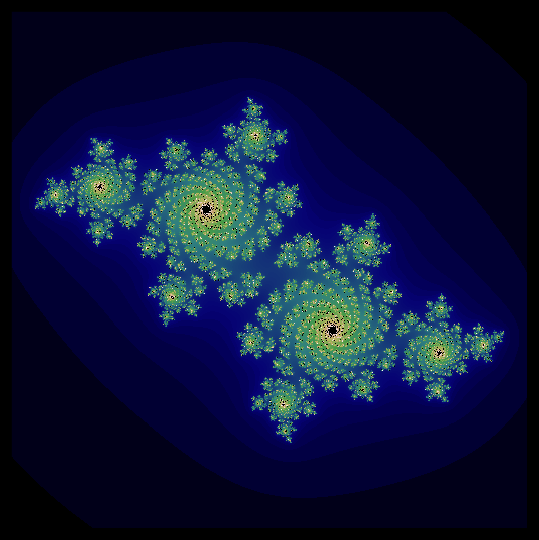

In [3]:
n = 2^9
x = range(-1.5, 1.5; length=n)
y = range(-1.5, 1.5; length=n)
z = complex.(x', y)
c = -0.380 + 0.605im
f_julia(z, c) = z^2 + c

@show typeof(z)
@time j = julia.(f_julia, z, c, 2^8)
@time j = julia.(f_julia, z, c, 2^8)
@show typeof(j)
plotjulia(j)

In [4]:
g(z, c) = z^4 + c
c = 0.63 + 0.37im

0.63 + 0.37im

typeof(z) = Matrix{ComplexF64}
  7.911391 seconds (360.87 k allocations: 19.713 MiB, 1.25% compilation time)
  7.842944 seconds (35 allocations: 316.570 KiB)
typeof(j) = Matrix{Float64}


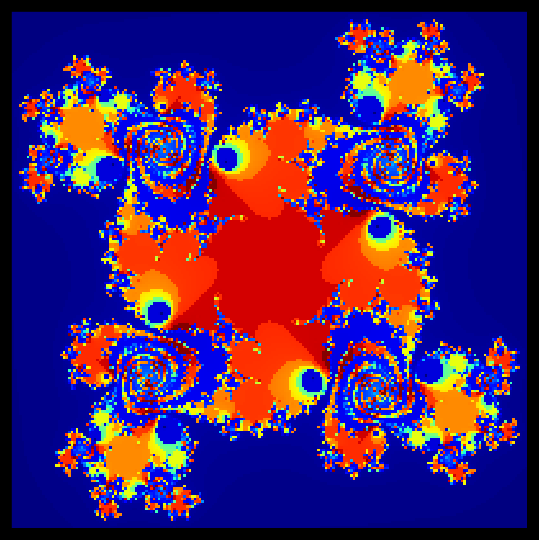

In [5]:
x = range(-1, 1, 201)
y = range(-1, 1, 201)
z = complex.(x', y)
@show typeof(z)
@time j = julia.(g, z, c, 2^14, 1e2, 1e-5)
@time j = julia.(g, z, c, 2^14, 1e2, 1e-5)
@show typeof(j)
m = j
plotmandelbrot(.∛m; color=:jet1)

typeof(z) = Matrix{ComplexF64}
  2.331978 seconds (1.51 M allocations: 82.475 MiB, 0.90% gc time, 45.87% compilation time)
typeof(z_cuda) = CuArray{ComplexF64, 2, CUDA.Mem.DeviceBuffer}
 10.990154 seconds (20.94 M allocations: 1.113 GiB, 2.37% gc time, 26.90% compilation time)
  0.000107 seconds (61 allocations: 2.758 KiB)
typeof(j_cuda) = CuArray{Float64, 2, CUDA.Mem.DeviceBuffer}
  0.878475 seconds (200.17 k allocations: 11.027 MiB, 13.07% compilation time)


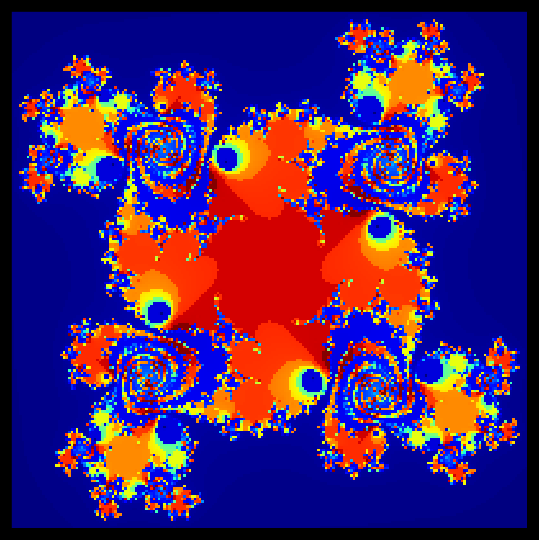

In [6]:
x = range(-1, 1, 201)
y = range(-1, 1, 201)
z = complex.(x', y)
@show typeof(z)
@time z_cuda = CuMatrix{ComplexF64}(z)
@show typeof(z_cuda)
@time j_cuda = julia.(g, z_cuda, c, 2^14, 1e2, 1e-5)
@time j_cuda = julia.(g, z_cuda, c, 2^14, 1e2, 1e-5)
@show typeof(j_cuda)
@time m = Matrix(j_cuda)
plotmandelbrot(.∛m; color=:jet1)

typeof(z) = Matrix{ComplexF64}
  0.011974 seconds (6 allocations: 176 bytes)
typeof(z_cuda) = CuArray{ComplexF64, 2, CUDA.Mem.DeviceBuffer}
  0.000278 seconds (61 allocations: 2.758 KiB)
typeof(j_cuda) = CuArray{Float64, 2, CUDA.Mem.DeviceBuffer}
 20.701037 seconds (23 allocations: 30.549 MiB)


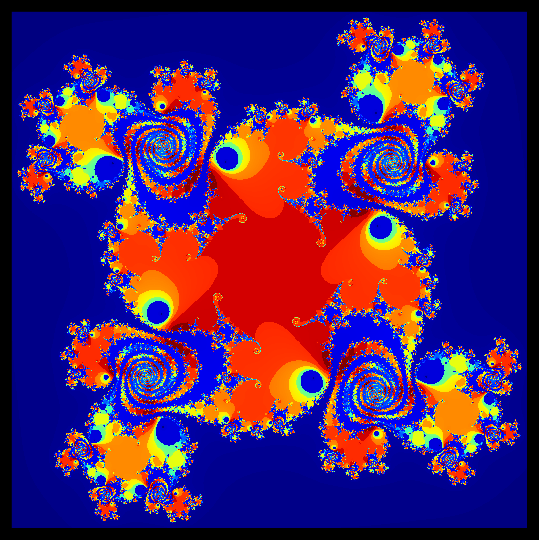

In [7]:
x = range(-1, 1, 2001)
y = range(-1, 1, 2001)
z = complex.(x', y)
@show typeof(z)
@time z_cuda = CuMatrix{ComplexF64}(z)
@show typeof(z_cuda)
@time j_cuda = julia.(g, z_cuda, c, 2^14, 1e2, 1e-5)
@show typeof(j_cuda)
@time m = Matrix(j_cuda)
plotmandelbrot(.∛m; color=:jet1)

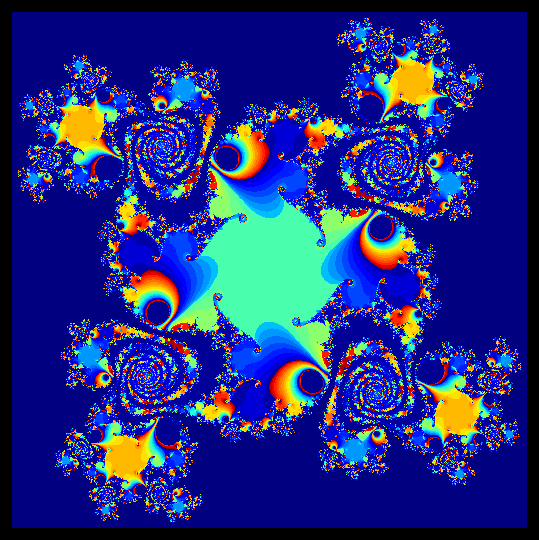

In [8]:
plotmandelbrot(mod.(m, 2^11); color=:jet1)